In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from enzyme.scripts.config import get_config
from enzyme import PRJ_ROOT
from enzyme.plot_helper import no_autoscale, xylabel_to_ticks
from enzyme import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from enzyme.scripts.plot_config import *
from enzyme.scripts.plotters import *
from enzyme.src.mouse_task.get_data import get_data
from enzyme.src.helper import save_plot
from enzyme.plot_helper import add_panel_label

plotting_data = get_data(name = "large_100_batch_3")
batch_num = 10

loading data...


In [3]:
# row assignments

# sf indexes
i_legend = 0
i_mult = 1
i_rew_rate = 2
i_wait = 3
i_p_act = 4

height_ratios = [
    1/2, 
    1.5, 
    2, 
    2
]

dict_keys(['00', '10', '20', '30', '40', '01', '11', '21', '31', '41', '02', '12', '22', '32', '42'])


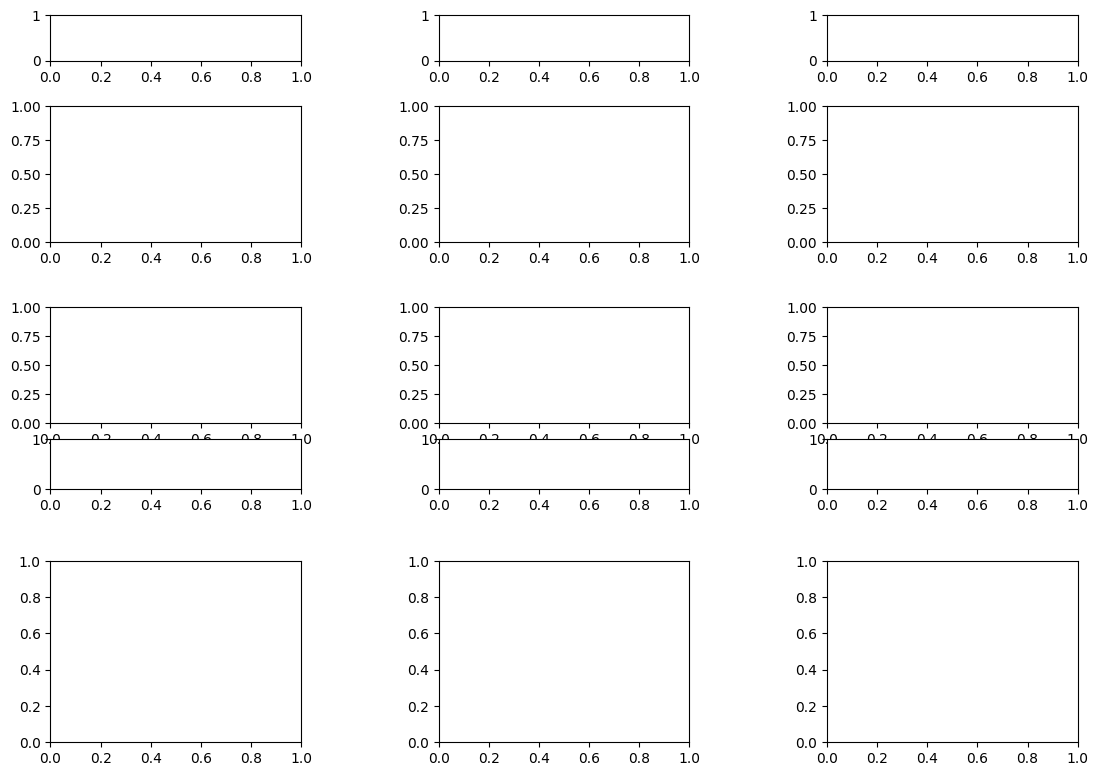

In [4]:
# super complicated nested subfigure layout

from enzyme.plot_helper import plotting_context
import seaborn as sns
# ctx = plotting_context('paper', font_scale=1., scale=.2)
# sns.set_context(ctx)

s = 2
w, h = (TEXTWIDTH*s, s*TEXTHEIGHT*.4)
fig_belief = plt.figure(figsize=(w, h), layout="none")

nrows_sf, ncols_sf = 4, 3
subfigs_b_vert = fig_belief.subfigures(1, ncols_sf, hspace=.1)

subfigs_b_horz = [subfigs_b_vert[j].subfigures(nrows_sf, 1, hspace=.1, height_ratios=height_ratios) for j in range(ncols_sf)]

fig_belief.set_constrained_layout_pads(h_pad=0.05, w_pad=0.05, hspace=0.1, wspace=0.2)

axd = {}
j_axd = 0
i_axd = 0

for j_sf in range(ncols_sf):
    i_axd = 0
    for i_sf in range(nrows_sf):

        subfig = subfigs_b_horz[j_sf][i_sf]
        if False:
            # moved to below
            mosaic = [[f'{i_axd}{j_axd}_x', '.'],
                      [f'{i_axd}{j_axd}_Q', f'{i_sf}{j_axd}_y']
                        ]
            axd_ = subfig.subplot_mosaic(mosaic, height_ratios=(1, 4), width_ratios=(4, 1), gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
            # axd_[f'{i}{j}_Q'].set_box_aspect(1)  
            # axd_[f'{i}{j}_x'].set_aspect(1/4)
            # axd_[f'{i}{j}_y'].set_aspect(4/1)
            axd |= axd_  # merge dictionaries
        elif i_sf == i_rew_rate:
            axes = subfig.subplots(2, 1, height_ratios=[.7, .3])
            axd[f'{i_axd}{j_axd}'] = axes[0]
            i_axd += 1
            axd[f'{i_axd}{j_axd}'] = axes[1]
        else:
            ax = subfig.subplots()
            axd[f'{i_axd}{j_axd}'] = ax
        i_axd += 1
    j_axd += 1
print(axd.keys())

plt.show()

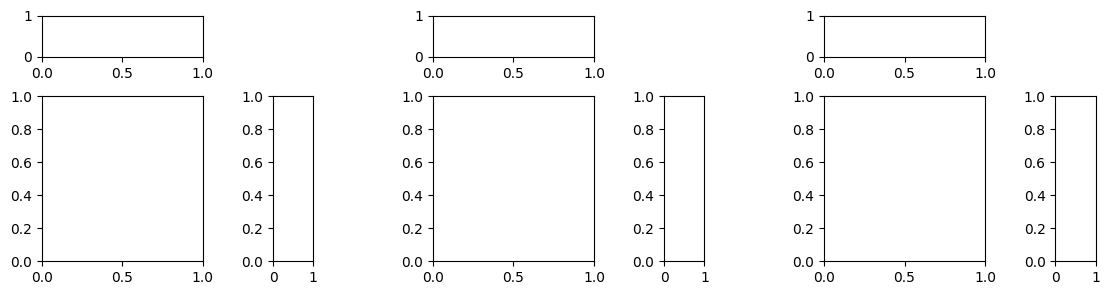

In [5]:
w, h = (TEXTWIDTH*s*1., s*TEXTHEIGHT*.15)
fig_heatmap = plt.figure(figsize=(w, h), layout="compressed")
fig_heatmap.set_constrained_layout_pads(w_pad=0.05, h_pad=0.05, hspace=0.2, wspace=0.2)

sfig_heatmaps = fig_heatmap.subfigures(1, 3)

i_Qmap = 3

for j_sf in range(ncols_sf):
    mosaic = [
        [f'{i_Qmap}{j_sf}_x', '.'],
        [f'{i_Qmap}{j_sf}_Q', f'{i_Qmap}{j_sf}_y']
    ]
    sfig_heatmap = sfig_heatmaps[j_sf]
    axd_ = sfig_heatmap.subplot_mosaic(mosaic, height_ratios=(1, 4), width_ratios=(4, 1), gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
    axd |= axd_

plt.show()

dict_keys(['A0', 'B0', 'A1', 'B1', 'A2', 'B2', '00', '10', '20', '30', '40', '01', '11', '21', '31', '41', '02', '12', '22', '32', '42', '30_x', '30_Q', '30_y', '31_x', '31_Q', '31_y', '32_x', '32_Q', '32_y'])


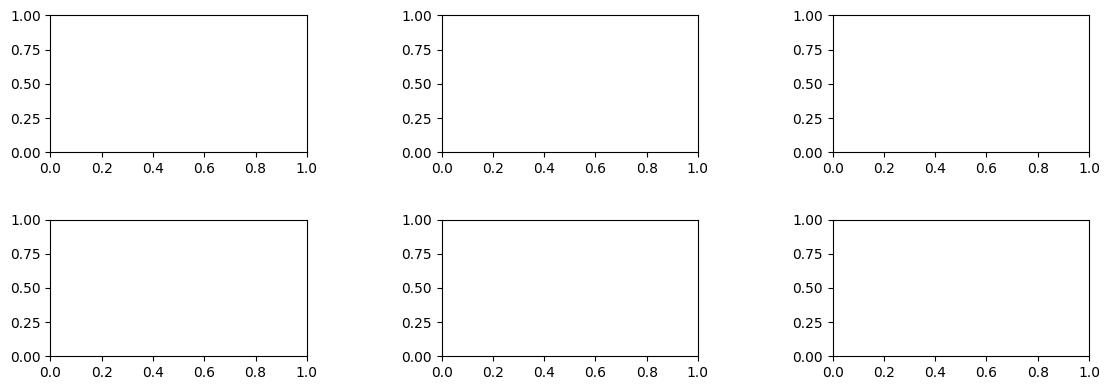

In [6]:
w, h = (TEXTWIDTH*s*1., s*TEXTHEIGHT*.2)
fig_pca = plt.figure(figsize=(w, h), layout="compressed")

nrows_sf, ncols_sf = 3, 3
subfigs_pca = fig_pca.subfigures(1, ncols_sf, hspace=.2)
fig_pca.set_constrained_layout_pads(w_pad=0.05, h_pad=0.05, hspace=0.2, wspace=0.2)

mosaics = [
    [
        [f'A{j}',],
        [f'B{j}',],
        # [f'A{i}', f'b{i}', f'A{i}'],
    ]
            for j in range(ncols_sf)]

axds = [subfigs_pca[j].subplot_mosaic(mosaics[j],  height_ratios=(1, 1)) for j in range(3)]
axd = {**axds[0], **axds[1], **axds[2]} | axd
print(axd.keys())
plt.show()

In [7]:
# axes couplings
for j_sf in range(ncols_sf):    
    axd[f'{i_rew_rate}{j_sf}'].sharex(axd[f'{i_wait}{j_sf}'])
    axd[f'{i_rew_rate}{j_sf}'].xaxis.set_visible(False)

for i_sf in range(ncols_sf):
    if i_sf in [i_mult]: continue  # blacklist some axes sharings
    for j_sf in range(1, 3):
        axd[f'{i_sf}{j_sf}'].sharey(axd[f'{i_sf}{0}'])

# fig.set_constrained_layout_pads(w_pad=0.05, h_pad=0.05, hspace=0.1, wspace=0.1)

axes = np.array([[axd[f'{i_rew_rate}{j}'], axd[f'B{j}'], axd[f'A{j}']] for j in range(ncols_sf)])
height_ratios = (.9,.07)


In [8]:
# FIGURE 5: 
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

agents =  [plotting_data["random_LSTM"], plotting_data["random_LSTM_plus_ctx"],  plotting_data["trained_LSTM_soft"]]
agent_names = ["random_LSTM", "random_LSTM_plus_ctx","trained_LSTM_soft"]

for ax in axd.values():
    ax.cla()

PGOs = np.array(plotting_data["bayes_agent_and_trained_LSTM_representation"]["PGO_range"])
PGO_N = len(PGOs)

action_max =  max(plotting_data["trained_LSTM_soft"]["action_prob_per_PGO"].max(),
    plotting_data["random_LSTM_plus_ctx"]["action_prob_per_PGO"].max(),
    plotting_data["random_LSTM"]["action_prob_per_PGO"].max())
action_min = min(plotting_data["trained_LSTM_soft"]["action_prob_per_PGO"].max(),
    plotting_data["random_LSTM_plus_ctx"]["action_prob_per_PGO"].max(),
    plotting_data["random_LSTM"]["action_prob_per_PGO"].max())

stim_bool  = .8

for p_, PGO in enumerate(PGO_show):
    c_PGO = cmap_cool(PGO)  # only RBG instead of RGBA

    p = np.argmin(np.abs(PGOs - PGO))

    def plot(axes, data, x_MU, y_MU, x_STD, y_STD, x_batch, y_batch, i, metrics, m):
        # TODO put a legend that is the actino colormap
        ax_rate, ax_wait, ax_pca_13, ax_pca_12 = axes

        # TODO do the plotting on ax_pca_13 as well

        s_before_act = -9#-10#-8

        if i == 0:
            solid_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor='black', alpha=1)
            faint_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor='black', alpha=0.2)
            ax_pca_12.legend(
                [faint_circle, solid_circle], 
                [rf"$ p(x_t | \theta) \leq p(x) $", rf" $p(x_t | \theta) $ > $ p(x) $"],
                loc='upper right', 
                fontsize='x-large',  # Make the font size smaller
                markerscale=0.7,    # Scale down the marker size
                handletextpad=0.4,  # Decrease the space between the marker and the text
                borderpad=0.3,      # Decrease the space between the legend border and the content
                labelspacing=0.3,   # Decrease the space between the legend entries
                frameon=False
            )
        
        stim_norm = cm.colors.Normalize(0, 1.)      
        act_prob_cmap = cm.ScalarMappable(cmap=action_cmap, norm = cm.colors.Normalize(-.05, .3))       

        all_stim = data["avg_stim_per_PGO"][:, s_before_act:]
        a_s = data["avg_stim_per_PGO"][p][s_before_act:]
        a = data["action_prob_per_PGO"][p]
        x = data["PC1_til_action_per_PGO"][p][s_before_act:]
        y = data["PC2_til_action_per_PGO"][p][s_before_act:]
        c_act = act_prob_cmap.to_rgba(a.max())
        l, = ax_pca_12.plot(x, y, c = c_PGO, alpha=1.)
        
        for i, (x_, y_, a_s_) in enumerate(zip(x, y, a_s)):
            #alpha =  .2 + .8*(a_s_ >stim_bool)
            alpha =  .2 + .8*(a_s_ > all_stim.mean())

            ax_pca_12.plot([x_], [y_], mfc = (c_PGO, 1.), alpha = alpha, markeredgecolor = 'k', marker="o", )
        ax_pca_12.plot(x_, y_, color = c_act, marker="s", ls="none", mec=c_act, markersize = 4)
        
        all_stim = data["avg_stim_per_PGO"][:, :-s_before_act]
        a_s = data["avg_stim_per_PGO_from_act"][p][:-s_before_act]
        x = data["PC1_from_action_per_PGO"][p][:-s_before_act]
        y = data["PC3_from_action_per_PGO"][p][:-s_before_act]
        l, = ax_pca_13.plot(x, y, c = c_PGO, alpha=1.)
        
        for _, (x_, y_, a_s_) in enumerate(zip(x, y, a_s)):
            alpha =  .2 + .8*(a_s_ >  all_stim.mean())

            ax_pca_13.plot([x_], [y_], mfc = (c_PGO, 1.), alpha = alpha, markeredgecolor = 'k', marker="o", )
        ax_pca_13.plot(x[0], y[0], color = c_act, marker="s", ls="none", mec=c_act,  markersize = 4)
        
        
        
       
        ax = ax_rate
        metrics_LSTM_ = metrics[PGO]
        ax.margins(y=.9)

        mfc = (c_PGO[0], c_PGO[1], c_PGO[2], 1)
        
        ax.plot( x_MU[p],  y_MU[p], color=c_PGO, marker = m, ls="none",  mec=mec, zorder=-3, markersize = 10)
        ax.errorbar( x_MU[p] ,  y_MU[p],  xerr= x_STD[p], yerr =  y_STD[p], color='r', marker=None, zorder = 1, elinewidth = 2)
  #      for a in range(batch_num):
  #          ax.plot(x_batch[a, p], y_batch[a, p], markersize = 3, mfc=mfc,
  #              marker = marker_nw, mec='k', zorder = -2, mew = .5)
        # JB: would not do a legend, we can do that in the caption
        # ax.legend(["optimality", "network", "bayes"],   prop={'size': 6})

        x = plotting_data["bayes_agent_and_trained_LSTM_representation"]["analytical_rew_rate_curves_x_axis"]
        y = plotting_data["bayes_agent_and_trained_LSTM_representation"]["analytical_rew_rate_curves_y_axis"][p]

        # make new line collection – hack
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, color=c_PGO, zorder=-4,)

        ax.add_collection(lc, autolim=False)

    markers = ['X', 'P', 'o']
    agents =  [plotting_data["random_LSTM"], plotting_data["random_LSTM_plus_ctx"],  plotting_data["trained_LSTM_soft"]]

    for j_sf, (_, data, name, m) in enumerate(zip(np.arange(nrows_sf), agents, agent_names, markers)):

        batch_waits = batch_to_concat(plotting_data, "net_wait_from_last_nogo_vec", name, batch_num)
        batch_PGOs = batch_to_concat(plotting_data, "trial_PGO_vec", name, batch_num)

        ax_row = [axd[f'{i_rew_rate}{j_sf}'], axd[f'{i_wait}{j_sf}'], axd[f'B{j_sf}'], axd[f'A{j_sf}']]
        ax_rate, ax_wait, ax_pca_13, ax_pca_12 = ax_row
        ax_wait.cla()
        
        metrics = plot_t_wait_dist(ax_wait, 
                         PGOs_data=batch_PGOs , 
                         t_waits=batch_waits , 
                         dist_mode="hist",
                         marker=marker_nw, bw_method=1/4, mode_mode='kde',
                         alpha_fill=.1/9)
        ax_wait.set_ylim([0, None])
        x_MU, x_STD, x_batch = batch_to_MU_STD(plotting_data, "analytical_rew_rate_points_x_axis", name, batch_num)
        y_MU, y_STD, y_batch = batch_to_MU_STD(plotting_data, "analytical_rew_rate_points_y_axis", name, batch_num)

        plot(ax_row, data, x_MU, y_MU, x_STD, y_STD, x_batch, y_batch, j_sf, metrics, m)


In [9]:
# make a colorbar for the action colormap at the top right axies
# dummy mappable

#mappable = cm.ScalarMappable(cmap=action_cmap, norm = cm.colors.Normalize(-.05, .3)) 
#cbar = fig_belief.colorbar(mappable, ax=axd[f'A{2}'], orientation='vertical')
#cbar.set_ticks([])
#cbar.set_label(r"$P(\text{action})$", rotation=0, labelpad=0)
#cbar.ax.yaxis.label.set_position((0.5, 1.3)) 

[INFO] [2025-02-04 16:50:14] in enzyme.scripts.plotters: collecting variables
[INFO] [2025-02-04 16:50:15] in enzyme.scripts.plotters: getting heatmaps
[INFO] [2025-02-04 16:50:18] in enzyme.scripts.plotters: plotting heatmaps
[INFO] [2025-02-04 16:50:18] in enzyme.scripts.plotters: getting regression
[INFO] [2025-02-04 16:50:18] in enzyme.scripts.plotters: getting histograms
[INFO] [2025-02-04 16:50:18] in enzyme.scripts.plotters: plotting histograms
[INFO] [2025-02-04 16:50:18] in enzyme.scripts.plotters: collecting variables
[INFO] [2025-02-04 16:50:19] in enzyme.scripts.plotters: getting heatmaps
[INFO] [2025-02-04 16:50:22] in enzyme.scripts.plotters: plotting heatmaps
[INFO] [2025-02-04 16:50:22] in enzyme.scripts.plotters: getting regression
[INFO] [2025-02-04 16:50:22] in enzyme.scripts.plotters: getting histograms
[INFO] [2025-02-04 16:50:23] in enzyme.scripts.plotters: plotting histograms
[INFO] [2025-02-04 16:50:23] in enzyme.scripts.plotters: collecting variables
[INFO] [20

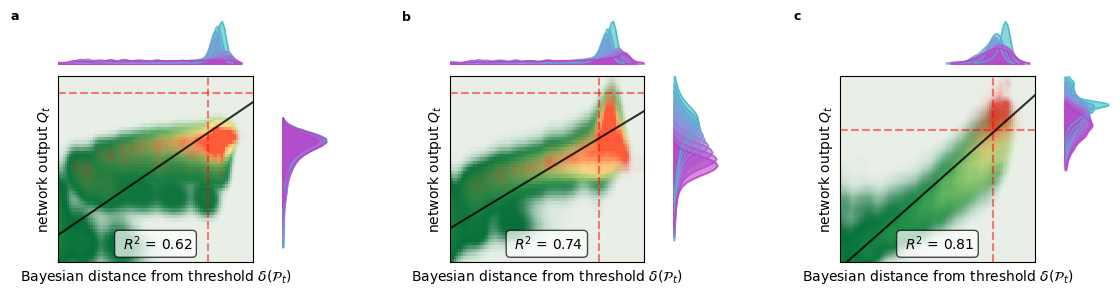

In [10]:
# Q_heatmap

axes_ = [[axd[f'{i_Qmap}{j}_Q'], axd[f'{i_Qmap}{j}_x'], axd[f'{i_Qmap}{j}_y']] for j in range(ncols_sf)]
agent_names = ["random_LSTM", "random_LSTM_plus_ctx","trained_LSTM_soft"]
ylims = [[-5,.5], [-5,.5], None]
from enzyme.scripts.plotters import plot_heatmap_and_dists
j_ = 0
for (ax_Q_heatmap, ax_x_hist, ax_y_hist), name, ylim in zip(axes_, agent_names, ylims):
    ax_Q_heatmap.cla()
    ax_x_hist.cla()
    ax_y_hist.cla()
    plot_heatmap_and_dists(plotting_data[name], ax_Q_heatmap, ax_x_hist, ax_y_hist,
    batch = True, agent_name = name, agent_num = batch_num, all_data = plotting_data, ylim = ylim)
#    if ylim is not None:
#        ax_Q_heatmap.set_ylim(y)

    add_panel_label(ax_x_hist, 'abc'[j_], x=-0.2, y=1.2)
    j_ += 1

fig_heatmap


In [11]:
save_plot("_fig_heatmap", fig=fig_heatmap, 
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])

In [12]:
#for i, y in enumerate([[-2.9,.5], [-2.8,.6], [-7.6, 2]]):
#    axd[f'{i_Qmap}{i}_Q'].set_ylim(y)


In [13]:
# LAYOUTING
axes[0, 0].set_ylim([.02, .04])
axes[1, 0].set_ylim([.02, .04])
axes[2, 0].set_ylim([.02, .04])

for ax in [axd[f'A{i}'] for i in range(3)]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("PC 1")
    ax.margins(.1, .1)
axd[f'A{0}'].set_ylabel("PC 2")

for ax in [axd[f'B{i}'] for i in range(3)]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("PC 1")
    ax.margins(.1, .1)
axd[f'B{0}'].set_ylabel("PC 3")

for j_sf in range(ncols_sf):
    if j_sf == 0:
        axd[f'A{j_sf}'].invert_yaxis()
    if j_sf == 2:
        #axd[f'A{j}'].invert_yaxis()
        axd[f'B{j_sf}'].invert_yaxis()

    if j_sf < 2:
#        axd[f'A{j}'].invert_xaxis()
        #axd[f'A{j}'].invert_yaxis()
        axd[f'B{j_sf}'].invert_xaxis()
 #   axd[f'B{j}'].invert_yaxis()
    axd[f'B{j_sf}'].sharex(axd[f'A{j_sf}'])

for ax in axes[:, -1]:
    ax.margins(.1)
    
for j_sf in range(ncols_sf):
    axd[f'{i_rew_rate}{j_sf}'].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    axd[f'{i_rew_rate}{j_sf}'].set_ylabel(rf"$r_t$", rotation=0, va="center")
    axd[f'{i_rew_rate}{j_sf}'].yaxis.set_major_locator(plt.MaxNLocator(1))

for j_sf in range(ncols_sf):
    axd[f'{i_wait}{j_sf}'].set_xlabel(rf"waiting time $\tau_w$")
    axd[f'{i_wait}{j_sf}'].set_ylabel(rf"")
    axd[f'{i_wait}{j_sf}'].margins(0, .2)
    axd[f'{i_wait}{j_sf}'].autoscale_view()
    axd[f'{i_wait}{j_sf}'].set_xticks([1, 14])
    axd[f'{i_wait}{j_sf}'].set_xlim([1, 14])
    axd[f'{i_wait}{j_sf}'].set_xticklabels([1,14])
    
    xylabel_to_ticks(axd[f'{i_wait}{j_sf}'], which="x")
    axd[f'{i_wait}{j_sf}'].set_ylabel(r"$P(\tau_w)$")

In [14]:
from matplotlib.transforms import blended_transform_factory


for j_sf, (subfig, title) in enumerate(zip(subfigs_b_vert, ["Untrained RNN", "Untrained RNN + Explicit Context", "Trained RNN"])):
    trafo = blended_transform_factory(subfig.transFigure, axd[f'{i_rew_rate}{j_sf}'].transAxes)
    subfigs_pca[j_sf].suptitle(title, size="small", fontweight='bold', y=1.1, va="bottom",)

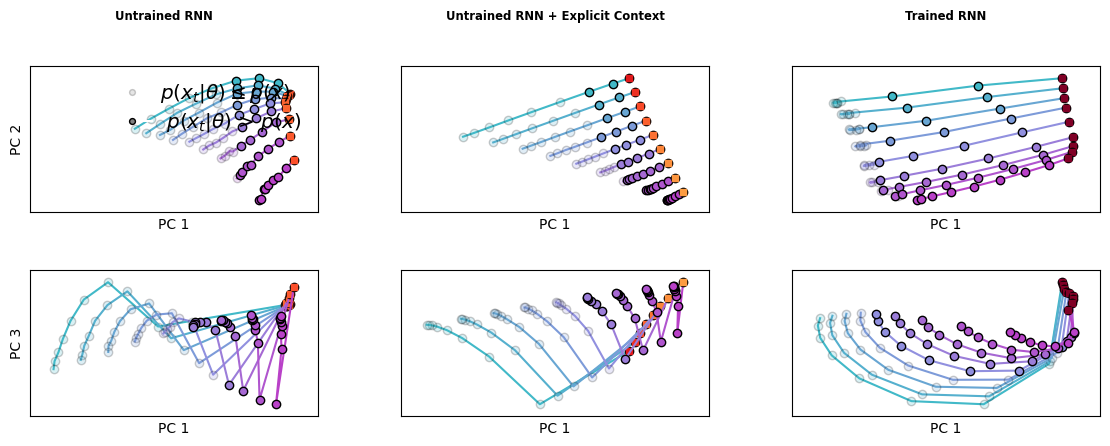

In [15]:
fig_belief
fig_pca


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression; 
net_est = plotting_data["bayes_agent_and_trained_LSTM_representation"]["net_state_estimate_CV"][:, None]
bayes_est = plotting_data["bayes_agent_and_trained_LSTM_representation"]["bayes_state_estimate"][:, None]
net_est = 1-np.exp(-net_est)
bayes_est = 1-np.exp(-bayes_est)
m = LinearRegression().fit(net_est, bayes_est)
R2 = m.score(net_est,bayes_est)
print(R2)

net_est = plotting_data["bayes_agent_and_trained_LSTM_representation"]["net_PGO_estimate_CV"][:, None]
bayes_est = plotting_data["bayes_agent_and_trained_LSTM_representation"]["bayes_PGO_estimate"][:, None]
m = LinearRegression().fit(net_est, bayes_est)
R2 = m.score(net_est,bayes_est)
print(R2)

0.9237643335824475
0.9459369523396478


In [17]:
axes_ = np.array([axd[f'{i_mult}{j}'] for j in range(ncols_sf)])
axes_ = axes_.reshape(1, -1)
for ax_ in np.ravel(axes_): ax_.cla()

# TODO @JS which dicts to we need to choose here?
agents =  [plotting_data["bayes_agent_and_trained_LSTM_representation"], 
       plotting_data["trained_LSTM_soft"],
       plotting_data["random_LSTM"],
       plotting_data["random_LSTM_plus_ctx"]]

agent_names = ["bayes", "trained_LSTM_soft","random_LSTM", "random_LSTM_plus_ctx"]

ms = ["*", "o", "X", "P"]
ls = ["--", "-", "dotted", "dotted"]
markersize_dflt = plt.rcParams['lines.markersize']
ss = [markersize_dflt*2, markersize_dflt*1.5, markersize_dflt*1.5, markersize_dflt*1.5]
xax = PGO_show
wait_var = np.zeros((len(agents), len(PGO_show)))
wait_var_SE = np.zeros((len(agents), len(PGO_show)))

agent_batch_data = dict()
for name in agent_names:
    if name != "bayes":
        agent_batch_data[name] = dict() 
        for var in ["trial_PGO_vec", "net_wait_from_last_nogo_vec"]:
            agent_batch_data[name][var] = batch_to_object_array(plotting_data, var, name, batch_num) 
        for var in ["analytical_rew_rate_points_x_axis", "analytical_rew_rate_points_y_axis"]:
            MU, STD, d_batch = batch_to_MU_STD(plotting_data, var, name, batch_num)
            agent_batch_data[name][var] = dict()
            agent_batch_data[name][var]["MU"] = MU 
            agent_batch_data[name][var]["STD"] = STD 

for p_i, p in enumerate(PGO_show):
    c = cmap_cool(p / float(max(PGO_show)))  # Normalize PGO_show for colormap
    for d_i, (d, n, m, s, l) in enumerate(zip(agents, agent_names, ms, ss, ls)):
        if d_i == 0:
            inds = np.where(d["trial_PGO_vec"] == p)[0]
            D2 = d["analytical_rew_rate_points_y_axis"]
            wait_var[d_i, p_i] = d["bayes_wait_from_last_nogo_vec"][inds].var()

            axes_[0, 0].plot(xax[p_i], D2[p_i], color=c, marker=m, markersize = s,
                  markerfacecolor=(c[0], c[1], c[2], 0.75), mec=mec, zorder = 0)
            axes_[0, 0].plot(xax,  D2, color='k', linestyle = l, zorder = -10)

            axes_[0, 2].plot(xax[p_i], wait_var[d_i, p_i], color=c, marker=m, markersize = s,
                      markerfacecolor=(c[0], c[1], c[2], 0.75), mec=mec, zorder = 0) 
        else:
            MU_wait = agent_batch_data[n]["analytical_rew_rate_points_x_axis"]["MU"]
            STD_wait = agent_batch_data[n]["analytical_rew_rate_points_x_axis"]["STD"]
            MU_rate = agent_batch_data[n]["analytical_rew_rate_points_y_axis"]["MU"]
            STD_rate = agent_batch_data[n]["analytical_rew_rate_points_y_axis"]["STD"]
            batch_var = np.zeros(batch_num)
            for b in range(batch_num): 
                curr_batch = agent_batch_data[n]
                inds = np.where(curr_batch["trial_PGO_vec"][b] == p)[0]
                batch_var[b] = curr_batch["net_wait_from_last_nogo_vec"][b][inds].var()
            wait_var[d_i, p_i] = batch_var.mean()
            wait_var_SE[d_i, p_i] = batch_var.std()/np.sqrt(batch_num)

            axes_[0, 0].errorbar(xax[p_i], MU_rate[p_i],  yerr = STD_rate[p_i],
                color='r', marker=None, zorder = 1, elinewidth = 2)
            axes_[0, 0].plot(xax[p_i], MU_rate[p_i], color=c, marker=m, markersize = s,
                markerfacecolor=(c[0], c[1], c[2], 0.75), mec=mec, zorder = -1)
            axes_[0, 0].plot(xax,  MU_rate, color='k', linestyle = l, zorder = -10)

            if d_i > 1:
                axes_[0, 1].errorbar(xax[p_i], MU_wait[p_i], yerr = STD_wait[p_i],
                    color='r', marker=None, zorder = 1, elinewidth = 2)
                axes_[0, 1].plot(xax[p_i], MU_wait[p_i], color=c, marker=m,markersize = s, 
                    markerfacecolor=(c[0], c[1], c[2], 0.75), mec=mec,  zorder = -1)
                axes_[0, 1].plot(xax, MU_wait, color='k', linestyle = l, zorder = -10)

            if d_i != 2:
                axes_[0, 2].errorbar(xax[p_i], wait_var[d_i, p_i], yerr = wait_var_SE[d_i, p_i],
                    color='r', marker=None, zorder = 1,elinewidth = 2)
                axes_[0, 2].plot(xax[p_i], wait_var[d_i, p_i], color=c, marker=m, markersize = s,
                    markerfacecolor=(c[0], c[1], c[2], 0.75), mec=mec, zorder = -1)
                if p == PGO_show[-1]:
                    axes_[0, 2].plot(xax, wait_var[d_i], color='k', linestyle = l, zorder = -10)

for j_sf in range(ncols_sf):
    axes_[0,j_sf].set_xlabel(r"$\theta$")
    axes_[0,j_sf].set_xticks(PGO_show)
    axes_[0,j_sf].set_xticklabels(PGO_show)
    axes_[0,j_sf].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

axes_[0,1].set_ylabel(fr"$\langle \tau_w \rangle$")
axes_[0,0].set_ylabel("$r_t$")
axes_[0,2].set_ylabel(fr"$\langle \delta\tau_w^2\rangle$")
axes_[0,1].set_ylim([2, 11])



(2.0, 11.0)

In [18]:
# decision variable regression
# plot_N_consec_vs_est_V2
# get_data


consecs = 14

datas = [plotting_data["random_LSTM"], 
       plotting_data["random_LSTM_plus_ctx"],  
       plotting_data["trained_LSTM_soft"],
       ]

names = ["random_LSTM", "random_LSTM_plus_ctx", "trained_LSTM_soft"]

for j_sf, (d,n) in enumerate(zip(datas, names)):
    sample_MU, _, _ = batch_to_MU_STD(plotting_data, "samples_vs_N_per_PGO", n, batch_num)
    p_act_MU, p_act_SE, _ = batch_to_MU_STD(plotting_data, "net_PSAFE_vs_N_per_PGO", n, batch_num)
    PGO_range = d["PGO_range"]
    ax = axd[f'{i_p_act}{j_sf}']
    ax.cla()

    min_r = 1
    max_r = 0
    min_sample_size = 1000 
    for j_sf in range(consecs - 1): 
        for p_i, p in enumerate(PGO_range):
            if p in PGO_show:
                if sample_MU[p_i, j_sf] > min_sample_size:
                    xax = np.arange(j_sf, j_sf+2)+1
                    y = p_act_MU.T[j_sf : j_sf+2,p_i]
                    pm = p_act_SE.T[j_sf : j_sf+2,p_i]
                    ax.plot(xax, y, alpha = 1, zorder=-1, c = cmap(p))
                    #ax.errorbar(xax, y, yerr = pm, linewidth = 0, elinewidth = 2, color = 'r', zorder = 1)
    ax.set_xticks([0, 15])
    ax.set_xlabel("consecutive GOs")
    
    xylabel_to_ticks(ax, which="x")
    ax.axhline(0, linestyle= '--', color = 'r')   
    # ax.axhline(np.log(0.5), linestyle= '--', color = 'r')   
    ax.set_xticks([1, 14])
#    ax.set_xlim([1, 14])
    ax.set_xticklabels([1,14])
    ax.set_ylabel(r"$Q_t$")
#    ax.set_ylim([-10,1])    



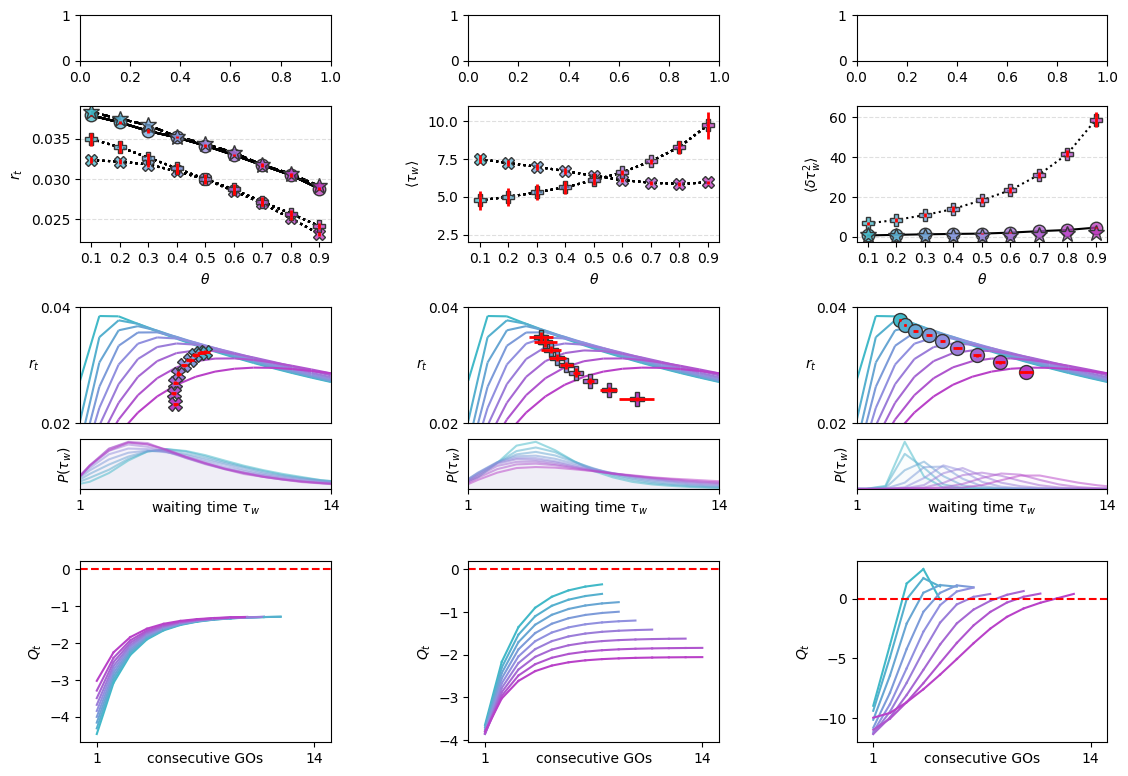

In [19]:

fig_belief

In [20]:
save_plot("_fig_pca", fig=fig_pca, 
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])

In [21]:

kv_pairs = {
    '10': 'a',
    '11': 'b',
    '12': 'c',
    '20': 'e',
    '21': 'f',
    '22': 'g',
    '40': 'h',
    '41': 'i',
    '42': 'j',
    
}

title_pairs = {
    f'{i_mult}0': 'reward rate',
    f'{i_mult}1': 'waiting time mean',
    f'{i_mult}2': 'waiting time variance',
    f'{i_rew_rate}0': 'untrained',
    f'{i_rew_rate}1': 'untrained + context',
    f'{i_rew_rate}2': 'trained',    
}

for k, ax in axd.items():
    if k in kv_pairs:
        add_panel_label(ax, kv_pairs[k].lower(), x=-0.2, y=1.2)

    if k in title_pairs:
        # we have to put the titles via text, as we need to call ax.set_title to get the panel labels so that they are respected by the plot layout engine
        ax.text(0.5, 1.1, title_pairs[k], ha='center', va='bottom', transform=ax.transAxes, fontsize='small', fontweight='bold')
    
for j_sf in range(ncols_sf):
    axd[f'{i_rew_rate}{j_sf}'].sharex(axd[f'{i_wait}{j_sf}'])
    axd[f'{i_rew_rate}{j_sf}'].autoscale_view()

for j_sf in range(ncols_sf):
    axd[f'{i_legend}{j_sf}'].axis('off')
    axd[f'{i_legend}{j_sf}'].set_title('')

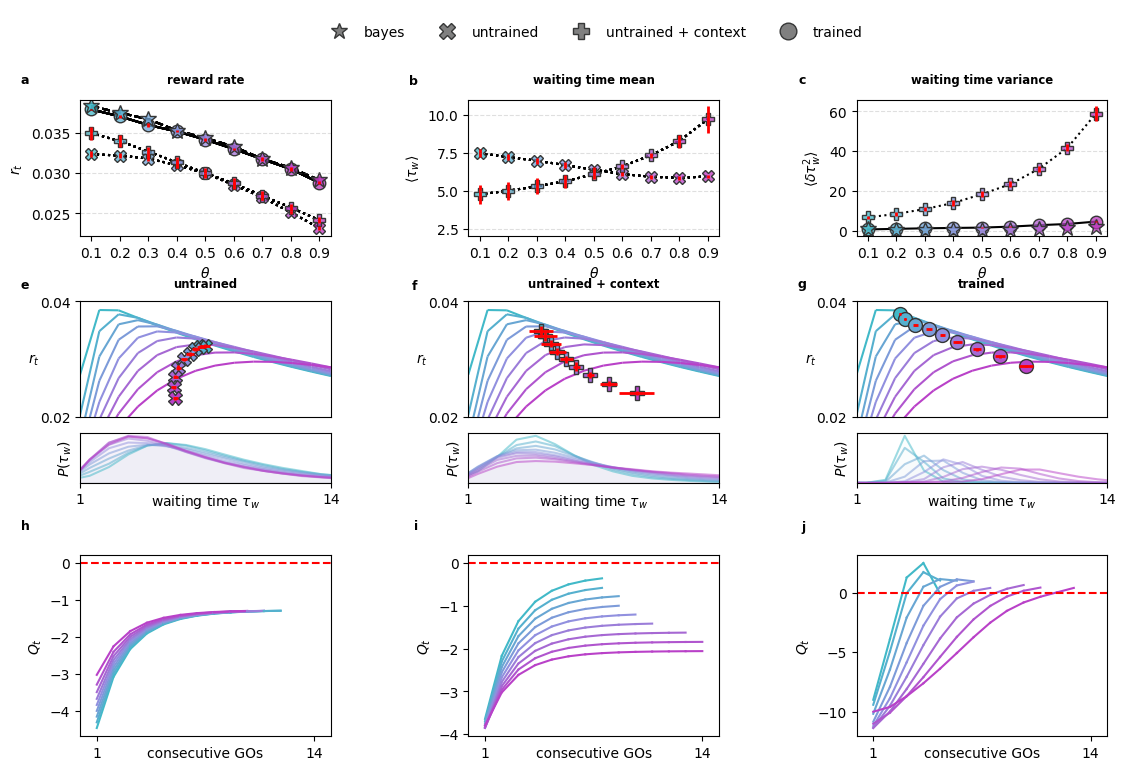

In [22]:
# make a figlegend
# creaet dummy artists

fig_belief.set_layout_engine('none')
_largs = dict(markersize=plt.rcParams['lines.markersize']*2)
l_bayes = Line2D([0], [0], marker='*', color='w', markerfacecolor='gray', markeredgecolor=mec, alpha=1, **_largs)
l_utrained = Line2D([0], [0], marker='X', color='w', markerfacecolor='gray', markeredgecolor=mec, alpha=1.,  **_largs)
l_trained = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor=mec,  alpha=1.,  **_largs)
l_ctx = Line2D([0], [0], marker='P', color='w', markerfacecolor='gray', markeredgecolor=mec, alpha=1.,  **_largs)

axd[f'{i_legend}1'].legend([l_bayes, l_utrained, l_ctx, l_trained], ["bayes",  "untrained", "untrained + context",  "trained",], ncol=4, frameon=False, loc='center')
fig_belief

In [23]:
save_plot("_fig_belief", fig=fig_belief, 
          bbox_inches = 'tight',
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])

In [24]:
save_plot("_fig_pca", fig=fig_pca, 
          bbox_inches = 'tight',
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])

In [25]:
#"""
As = [plotting_data["bayes_agent_and_trained_LSTM_representation"], plotting_data["bayes_agent_and_random_LSTM_representation"], 
     plotting_data["bayes_agent_and_random_LSTM_plus_ctx_representation"]]
name = ["trained", "random", "random + ctx"]
datas = ["10_fold_net_state_acc", "10_fold_bayes_state_acc", "10_fold_bayes_net_state_R2",\
         "10_fold_bayes_net_theta_R2", "10_fold_bayes_theta_R2", "10_fold_net_theta_R2", "10_fold_DV_R2"]

round_to = 4
for i_sf in range(len(As)):
    for d in datas:
        data = As[i_sf][d]
        print(name[i_sf], d[8:], "mean: ", data.mean().round(round_to), " std: ", data.std().round(round_to))
#"""
from scipy.stats import linregress

DV_R2s = np.zeros((2, 10))
for a_i, agent_name in enumerate(["trained_LSTM_soft", "random_LSTM"]):
    for a in range(10):
        name = agent_name + "_" + str(a) if a > 0 else agent_name
        P = plotting_data[name]
        act_inds = P["pre_act_flat"]
        net = P["net_DV_flat"][act_inds]
        bayes = P["bayes_DV_flat"][act_inds]
        
        DV_R2s[a_i, a] = linregress(net, bayes).rvalue ** 2


trained net_state_acc mean:  0.826  std:  0.0002
trained bayes_state_acc mean:  0.8282  std:  0.0001
trained bayes_net_state_R2 mean:  0.9844  std:  0.0
trained bayes_net_theta_R2 mean:  0.948  std:  0.0
trained bayes_theta_R2 mean:  0.9509  std:  0.0001
trained net_theta_R2 mean:  0.9311  std:  0.0001
trained DV_R2 mean:  0.9929  std:  0.0
random net_state_acc mean:  0.8221  std:  0.0002
random bayes_state_acc mean:  0.8257  std:  0.0001
random bayes_net_state_R2 mean:  0.9748  std:  0.0
random bayes_net_theta_R2 mean:  0.9153  std:  0.0001
random bayes_theta_R2 mean:  0.9515  std:  0.0001
random net_theta_R2 mean:  0.9154  std:  0.0001
random DV_R2 mean:  0.9894  std:  0.0
random + ctx net_state_acc mean:  0.827  std:  0.0001
random + ctx bayes_state_acc mean:  0.8276  std:  0.0001
random + ctx bayes_net_state_R2 mean:  0.9872  std:  0.0
random + ctx bayes_net_theta_R2 mean:  0.9656  std:  0.0
random + ctx bayes_theta_R2 mean:  0.9521  std:  0.0001
random + ctx net_theta_R2 mean:  0.

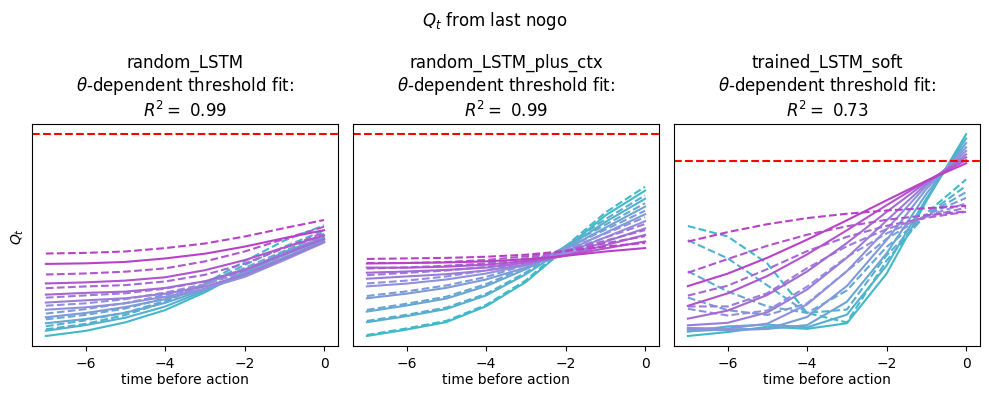

In [26]:

datas = [plotting_data["random_LSTM"], 
       plotting_data["random_LSTM_plus_ctx"],  
       plotting_data["trained_LSTM_soft"],
       ]

names = ["random_LSTM", "random_LSTM_plus_ctx", "trained_LSTM_soft"]
fig, axes = plt.subplots(1, 3, figsize = (10, 4), tight_layout = True)

steps = 8
xax = np.arange(-steps + 1, 1)
for j_sf, n in enumerate(names):
    mechanistic_mu, _, _ = batch_to_MU_STD(plotting_data, "mechanistic_from_nog_to_act", n, batch_num)
    QDIFF_mu, _, _ = batch_to_MU_STD(plotting_data, "QDIFF_from_nog_to_act", n, batch_num)
    R2_mu, _, _ = batch_to_MU_STD(plotting_data, "mechanistic_QDIFF_R2", n, batch_num)
    ax = axes[j_sf]

    for p_i, p in enumerate(PGO_show):
        y = QDIFF_mu[p_i]
        y_ = mechanistic_mu[p_i]
        mid = len(y)//2 + 1
        ax.plot(xax, y[mid - steps: mid], c = cmap(p))
        ax.plot(xax, y_[mid - steps: mid], c = cmap(p), linestyle = '--')
    ax.set_xlabel("\ntime before action")
    
    xylabel_to_ticks(ax, which="x")
    #ax.axhline(0, linestyle= '--', color = 'r')   
    ax.axhline(0, linestyle= '--', color = 'r')   
    ax.set_yticks([])
    if j_sf == 0:
        ax.set_ylabel(r"$Q_t$")

    T = r"$\theta$"
    ax.set_title(f"{n}\n{T}-dependent threshold fit:\n$R^2 =$ {R2_mu :.2f}")
#    ax.set_ylim([-10,1])    
title = fr"$Q_t$ from last nogo"
fig.suptitle(title)
fig

save_plot("_fig_from_nogo", fig=fig, 
          bbox_inches = 'tight',
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])